<br>

## 2. Crawling - Open API 활용

<br>

## 2-1) API Key 발급받기 & API 분석하기


#### 국토교통부 실거래가 정보 활용신청 필요 (@ data.go.kr) 
- 신청 후 인증키 발급까지 1시간 정도 소요되므로 미리 신청해두기 
- 접속 : https://www.data.go.kr/dataset/3050988/openapi.do 
- 로그인 
- 활용신청 for **상업업무용 부동산 매매 신고 자료**
- 상세기능정보 & 라이센스표시 항목의 체크박스 체크 후 그대로 "신청" 클릭

#### 인증키 받아오기
@ https://www.data.go.kr/dataset/3050988/openapi.do 

https://www.data.go.kr/subMain.jsp#/L3B1YnIvcG90L215cC9Jcm9zTXlQYWdlL29wZW5EZXZEZXRhaWxQYWdlJEBeMDgyTTAwMDAxMzBeTTAwMDAxMzUkQF5wdWJsaWNEYXRhRGV0YWlsUGs9dWRkaTo0MWM5YTBlMy02YzgwLTQ3YjMtODhjMC04NDk4YzgwYmMyZWMkQF5wcmN1c2VSZXFzdFNlcU5vPTEwODMwODc1JEBecmVxc3RTdGVwQ29kZT1TVENEMDE=

#### "미리보기 다운로드" 클릭 후, 발급받은 "일반 인증키 (UTF-8)"를 serviceKey 에 넣고 결과 미리보기가 가능
#### 위 "미리보기" 버튼을 눌렀을 때 브라우저에서 열린 새로운 Tab에서 URL 복사해 가져오기

### code.go.kr/
1. 코드검색
2. 코드명 - 법정동

http:// openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc # 전체 API 서비스 URL 
    /getRTMSDataSvcSilvTrade # "상업업무용 부동산 매매 신고정보" 요청에 해당하는 함수 (API 기능명)
    ?
    serviceKey=SljemAbplxJOW%2BJrw4ZqQhVpQKujt6n446gB2aTjZ40jBnGXqANgbx5xDiOfCxM7iqArjNcygNWGA6Na0Kx3yw%3D%3D
    # 발급받은 개인키 
    &
    LAWD_CD=11110
        # 각 지역별 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리
    &
    DEAL_YMD=201512
    # 실거래 자료의 계약년월(6자리)

## -> 해당 API 에 대한 상세 설명 및 사용법은 아래 이미지의 "참고문서" hwp 파일을 참고


<hr style="border-color:red; border-width:5px">
<br>

## 다른 지역으로 데이터를 받아오려면? 
## 법정동 코드 활용 @ www.code.go.kr (법정동코드 10자리 중 앞 5자리 -> LAWD_CD

<br>
- 상단 '코드검색' 탭 클릭 -> 좌측 '코드검색' 메뉴 클릭 -> 코드명 란에 '법정동' 입력 후 '조회' 버튼 클릭 
<br>
- -> 결과창의 "법정동" 클릭 -> 법정동명 란에 "관악구" 등 입력 후 "조회" 버튼 클릭

<br>



<br>

## 2-2) API 사용해 데이터 끌어와 분석하기


In [12]:
# 아래 출력의 링크를 클릭해 데이터를 먼저 살펴봅니다.
print('http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcNrgTrade?serviceKey=SljemAbplxJOW%2BJrw4ZqQhVpQKujt6n446gB2aTjZ40jBnGXqANgbx5xDiOfCxM7iqArjNcygNWGA6Na0Kx3yw%3D%3D&LAWD_CD=11110&DEAL_YMD=201512')

http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcNrgTrade?serviceKey=SljemAbplxJOW%2BJrw4ZqQhVpQKujt6n446gB2aTjZ40jBnGXqANgbx5xDiOfCxM7iqArjNcygNWGA6Na0Kx3yw%3D%3D&LAWD_CD=11110&DEAL_YMD=201512


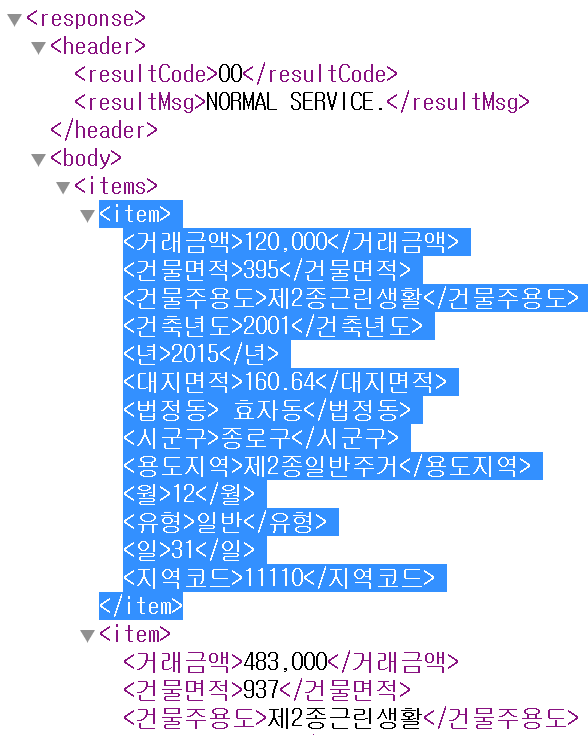

In [13]:
import requests
from bs4 import BeautifulSoup

In [14]:
# 발급받으신 여러분의 key를 넣어주세요.

#service_key = '발급 받은 key'

service_key= 'tqg6VZjLNvjzxtjXyUZBGs3QoNaQ%2FdVJgafYDzB12j9Ear1o5tm7UdVq7zPqX5eZcLjykwgfXIWXG4VMyx6iVg%3D%3D'
# SljemAbplxJOW%2BJrw4ZqQhVpQKujt6n446gB2aTjZ40jBnGXqANgbx5xDiOfCxM7iqArjNcygNWGA6Na0Kx3yw%3D%3D

In [15]:
base_url = 'http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcNrgTrade'
locate_code = '11110' # 종로구 
contract_date = '201910' # 2019년 10월에 거래된 내역 조회

In [16]:
request_url = base_url + '?' + "serviceKey=" + service_key + '&LAWD_CD=' + locate_code + '&DEAL_YMD=' + contract_date
print(request_url) # 아래 링크를 클릭해 결과가 잘 나오는지 확인합니다.

http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcNrgTrade?serviceKey=tqg6VZjLNvjzxtjXyUZBGs3QoNaQ%2FdVJgafYDzB12j9Ear1o5tm7UdVq7zPqX5eZcLjykwgfXIWXG4VMyx6iVg%3D%3D&LAWD_CD=11110&DEAL_YMD=201910


In [17]:
response = requests.get(request_url)
soup = BeautifulSoup(response.text, 'lxml-xml') # Parser가 바뀌었음에 유의합니다.

In [18]:
print(soup)

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><거래금액>260,000</거래금액><건물면적>320</건물면적><건물주용도>제2종근린생활</건물주용도><건축년도>1993</건축년도><년>2019</년><대지면적>144.4</대지면적><법정동> 청운동</법정동><시군구>종로구</시군구><용도지역>제2종일반주거</용도지역><월>10</월><유형>일반</유형><일>15</일><지역코드>11110</지역코드></item><item><거래금액>101,000</거래금액><건물면적>55</건물면적><건물주용도>제2종근린생활</건물주용도><년>2019</년><대지면적>104.6</대지면적><법정동> 통의동</법정동><시군구>종로구</시군구><용도지역>제2종일반주거</용도지역><월>10</월><유형>일반</유형><일>23</일><지역코드>11110</지역코드></item><item><거래금액>22,000</거래금액><건물면적>32</건물면적><건물주용도>제1종근린생활</건물주용도><건축년도>2003</건축년도><년>2019</년><대지면적> </대지면적><법정동> 적선동</법정동><시군구>종로구</시군구><용도지역>일반상업</용도지역><월>10</월><유형>집합</유형><일>31</일><지역코드>11110</지역코드></item><item><거래금액>118,000</거래금액><건물면적>40</건물면적><건물주용도>제1종근린생활</건물주용도><년>2019</년><대지면적>69.1</대지면적><법정동> 필운동</법정동><시군구>종로구</시군구><용도지역>제3종일반주거</용도지역><월>10</월><유형>일반</유형><일>14</일><지역코드>11110</지역코드></item><item><거래금액>99,000</거래금액><건물면적>82</건물면적><건물주용도>제2종

In [19]:
items = soup.find_all('item') # XML의 <~>는 HTML의 Tag와 같이 접근 가능합니다.

In [20]:
items[0]

<item><거래금액>260,000</거래금액><건물면적>320</건물면적><건물주용도>제2종근린생활</건물주용도><건축년도>1993</건축년도><년>2019</년><대지면적>144.4</대지면적><법정동> 청운동</법정동><시군구>종로구</시군구><용도지역>제2종일반주거</용도지역><월>10</월><유형>일반</유형><일>15</일><지역코드>11110</지역코드></item>

In [21]:
for item in items:
    
    try: # 에러 처리를 위한 try & except
        print('지역 코드 :', item.find('지역코드').get_text())
        print('거래 일자 :', item.find('년').get_text(), item.find('월').get_text(), item.find('일').get_text())
        print('거래 금액 :', item.find('거래금액').get_text())
        print('건물 면적 :', item.find('건물면적').get_text())
        print('대지 면적 :', item.find('대지면적').get_text())
        print('건축 년도 :', item.find('건축년도').get_text())
        print('건물 주용도 :', item.find('건물주용도').get_text())
        print('용도지역 :', item.find('용도지역').get_text())
        print('시군구 :', item.find('시군구').get_text())
        print('법정동 :', item.find('법정동').get_text())
        print('유형 :', item.find('유형').get_text())
        print()
    except:
        # 위 항목 중 하나라도 빠져있으면 해당 항목은 .get_text()가 불가하므로 에러가 발생합니다. 
        print()
        pass # 위 항목 중 하나라도 빠져있으면 출력에서 아예 제외합니다.

지역 코드 : 11110
거래 일자 : 2019 10 15
거래 금액 : 260,000
건물 면적 : 320
대지 면적 : 144.4
건축 년도 : 1993
건물 주용도 : 제2종근린생활
용도지역 : 제2종일반주거
시군구 : 종로구
법정동 :  청운동
유형 : 일반

지역 코드 : 11110
거래 일자 : 2019 10 23
거래 금액 : 101,000
건물 면적 : 55
대지 면적 : 104.6

지역 코드 : 11110
거래 일자 : 2019 10 31
거래 금액 : 22,000
건물 면적 : 32
대지 면적 :  
건축 년도 : 2003
건물 주용도 : 제1종근린생활
용도지역 : 일반상업
시군구 : 종로구
법정동 :  적선동
유형 : 집합

지역 코드 : 11110
거래 일자 : 2019 10 14
거래 금액 : 118,000
건물 면적 : 40
대지 면적 : 69.1

지역 코드 : 11110
거래 일자 : 2019 10 23
거래 금액 : 99,000
건물 면적 : 82
대지 면적 :  
건축 년도 : 2008
건물 주용도 : 제2종근린생활
용도지역 : 준주거
시군구 : 종로구
법정동 :  사직동
유형 : 집합

지역 코드 : 11110
거래 일자 : 2019 10 2
거래 금액 : 13,000
건물 면적 : 19
대지 면적 :  
건축 년도 : 1985
건물 주용도 : 판매
용도지역 : 일반상업
시군구 : 종로구
법정동 :  당주동
유형 : 집합

지역 코드 : 11110
거래 일자 : 2019 10 30
거래 금액 : 30,000
건물 면적 : 116
대지 면적 :  
건축 년도 : 1983
건물 주용도 : 판매
용도지역 : 일반상업
시군구 : 종로구
법정동 :  당주동
유형 : 집합

지역 코드 : 11110
거래 일자 : 2019 10 8
거래 금액 : 43,000
건물 면적 : 43
대지 면적 :  
건축 년도 : 2005
건물 주용도 : 업무
용도지역 : 일반상업
시군구 : 종로구
법정동 :  신문로1가
유형 : 집합

지역 코드 : 111

In [11]:
loc_code = []
loc = []
date = []
price = []
building_usage = []

for item in items:
    try:
        loc_code.append(item.find('지역코드').get_text())
        loc.append(item.find('시군구').get_text() + item.find('법정동').get_text())
        date.append(item.find('년').get_text() + item.find('월').get_text() + item.find('일').get_text())
        price.append(item.find('거래금액').get_text())
        building_usage.append(item.find('건물주용도').get_text())
        
        ##  ~~~.apnned()
    except:
        pass

import pandas as pd

df = pd.DataFrame({'지역코드':loc_code, '부동산 위치':loc, 
                   '거래 일자':date, '거래 금액':price, 
                   '부동산 용도':building_usage})
df.head()
#df

,지역코드,부동산 위치,거래 일자,거래 금액,부동산 용도
0,11110,종로구 청운동,20191015,"260,000",제2종근린생활
1,11110,종로구 통의동,20191023,"101,000",제2종근린생활
2,11110,종로구 적선동,20191031,"22,000",제1종근린생활
3,11110,종로구 필운동,20191014,"118,000",제1종근린생활
4,11110,종로구 사직동,20191023,"99,000",제2종근린생활
